# The completely randomized single factor experiment Example


In [5]:
fivepercent=[7,8,15,11,9,10]
tenpercent=[12,17,13,18,19,15]
fifeteenpercent=[14,18,19,17,16,18]
twentypercent=[19,25,22,23,18,20]


In [6]:
import matplotlib.pyplot as plt

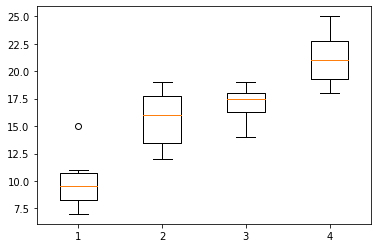

In [7]:
box_plot_data=(fivepercent,tenpercent,fifeteenpercent,twentypercent)
plt.boxplot(box_plot_data)
plt.show()

In [12]:
from scipy import stats
stats.f_oneway(fivepercent,tenpercent,fifeteenpercent,twentypercent)

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

In [14]:
stats.f.ppf(1-0.01,dfn=3,dfd=20)

4.938193382310539

# Since 19.605206999573184>4.938193382310539 (F-values) we reject null hypothesis.

# LSD Test

In [16]:
a=(-1)*stats.t.ppf(0.025,20)
import math
n=6
MSE=6.508333
lsd=a*math.sqrt(2*MSE/n)
lsd

3.072422588325206

# Tukey Kramer Test

In [17]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:
df=pd.read_excel('concentration.xlsx')

In [20]:
df

,concentration 5,concentration 10,concentration 15,concentration 20
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [22]:
data_r1=pd.melt(df.reset_index(),id_vars=['index'],value_vars=['concentration 5','concentration 10','concentration 15','concentration 20'])
data_r1.columns=['index','treatments','value']
data_r1

,index,treatments,value
0,0,concentration 5,7
1,1,concentration 5,8
2,2,concentration 5,15
3,3,concentration 5,11
4,4,concentration 5,9
5,5,concentration 5,10
6,0,concentration 10,12
7,1,concentration 10,17
8,2,concentration 10,13
9,3,concentration 10,18


In [23]:
model=ols('value~C(treatments)',data=data_r1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Wed, 01 Jan 2020   Prob (F-statistic):           3.59e-06
Time:                        12:46:38   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            15.6667      1.041     15.042      0.000      13.494      17.839
C(treatments)[T.concentration 15]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(treatments)[T.concentration 20]     5.5000      1.473      3.734      0.001       2.428       8.572
C(treatments)[T.concentration 5]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
anova_table =sm.stats.anova_lm(model,typ=1)
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc= MultiComparison(data_r1['value'],data_r1['treatments'])
mcresult=mc.tukeyhsd(0.05)
mcresult.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
concentration 10,concentration 15,1.3333,0.7827,-2.7894,5.4561,False
concentration 10,concentration 20,5.5,0.0066,1.3773,9.6227,True
concentration 10,concentration 5,-5.6667,0.0051,-9.7894,-1.5439,True
concentration 15,concentration 20,4.1667,0.047,0.0439,8.2894,True
concentration 15,concentration 5,-7.0,0.001,-11.1227,-2.8773,True
concentration 20,concentration 5,-11.1667,0.001,-15.2894,-7.0439,True


# Do another Example